In [29]:
from functools import lru_cache

@lru_cache(maxsize=None)
def solve_game(balls: int, strikes: int, p: float):

    if balls == 4:
        return 0, 0, 1.
    
    if strikes == 3:
        return 0., 0, 0.


    _, _, a = solve_game(balls+1, strikes, p)
    _, _, b = solve_game(balls, strikes+1, p)
    _, _, c = solve_game(balls, strikes+1, p)
    d = 4*p + (1-p)*solve_game(balls, strikes+1, p)[2]


    if max(min(a, b), min(c, d)) == min(max(a, c), max(b, d)):
        print("found saddle point")
        raise

    s = (d - b)/(a - b - c + d)
    r = (d - c)/(a - b - c + d)

    v = (a*d - b*c)/(a - b - c + d)

    return s, r, v

In [30]:
import numpy as np
from matplotlib import pyplot as plt

val = np.linspace(0.01, 0.99, num=1000)

v = [solve_game(0, 0, p)[2] for p in val]



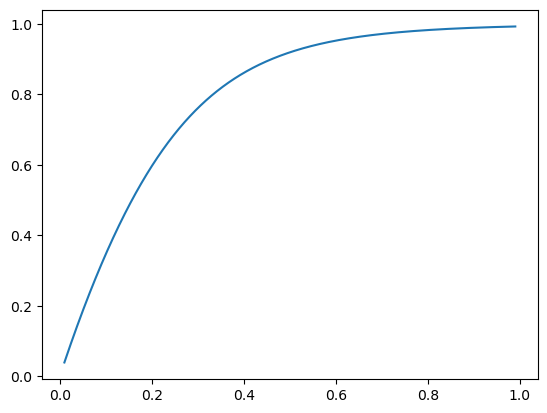

In [31]:
plt.plot(val, v)

We can see as p increases, the value of game increases to 1.0, as it becomes more and more likely for a strategy 

In [53]:
@lru_cache(maxsize=None)
def prob(balls: int, strikes: int, p: float):

    if balls == 0 and strikes == 0:
        return 1.0

    r = 0
    if balls > 0:
        s1, r1, _ = solve_game(balls - 1, strikes, p)
        r += s1 * r1 * prob(balls-1, strikes, p)
    
    if strikes > 0:
        s2, r2, _ = solve_game(balls, strikes -1, p)
        r += (s2*(1-r2) + (1-s2)*r2 + (1-s2)*(1-r2)*(1-p))*prob(balls, strikes-1, p)

    assert (r<1.0)
    assert (r >=0.)

    return r


In [54]:
prob_vals = [prob(3, 2, p) for p in val]

In [ ]:
def f(p):
    return prob(3, 2, p)

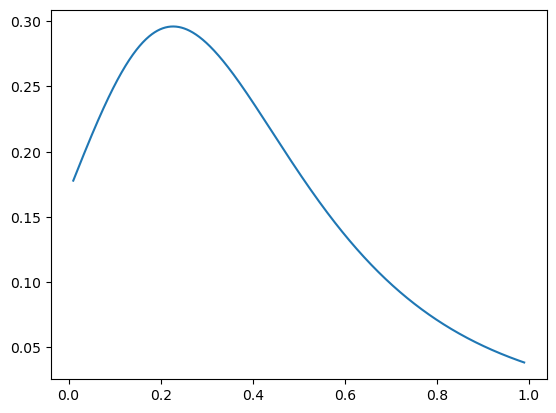

In [62]:
plt.plot(val, prob_vals)

In [64]:
from scipy import optimize 

In [ ]:
minimizer = optimize.brent(prob(3, 2), brack=(1, 2))